In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")

df = pd.read_csv('../data/raw/plant_growth_data.csv')

print("Dimensions du dataset:", df.shape)
print("\nAperçu des premières lignes:")
df.head()

Dimensions du dataset: (193, 7)

Aperçu des premières lignes:


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [10]:
print("\nInformation sur les types de données:")
df.info()

print("\nStatistiques descriptives:")
df.describe()



Information sur les types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB

Statistiques descriptives:


,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [11]:
print("\nValeurs manquantes par colonne:")
df.isnull().sum()



Valeurs manquantes par colonne:


Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

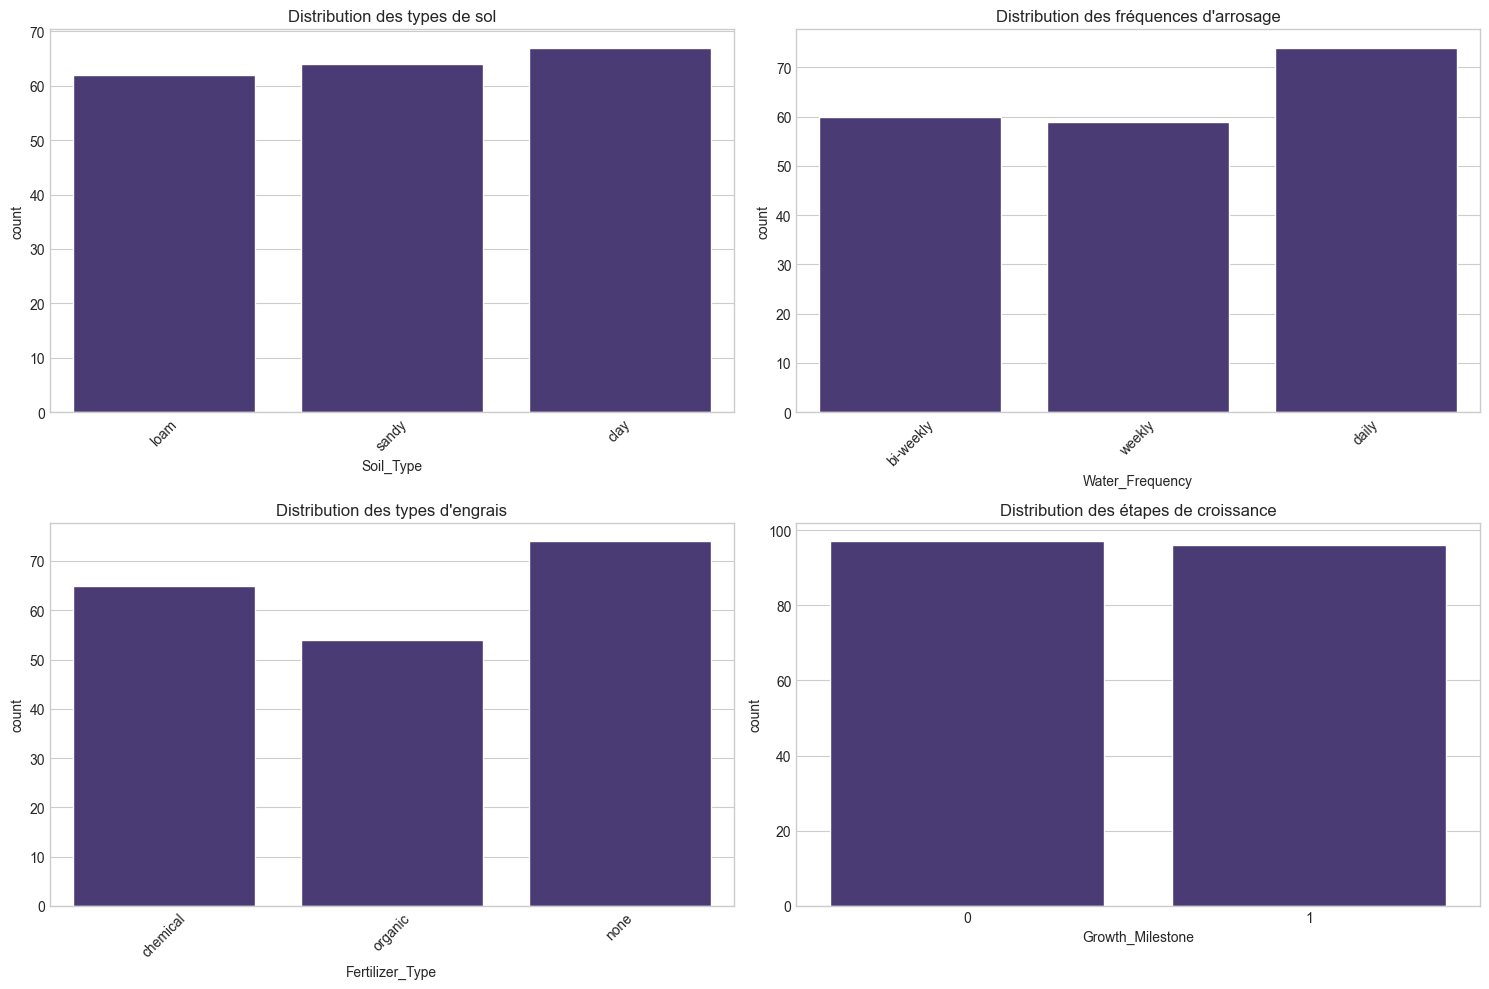

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Soil_Type', data=df)
plt.title('Distribution des types de sol')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='Water_Frequency', data=df)
plt.title('Distribution des fréquences d\'arrosage')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(x='Fertilizer_Type', data=df)
plt.title('Distribution des types d\'engrais')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Growth_Milestone', data=df)
plt.title('Distribution des étapes de croissance')
plt.tight_layout()
plt.show()


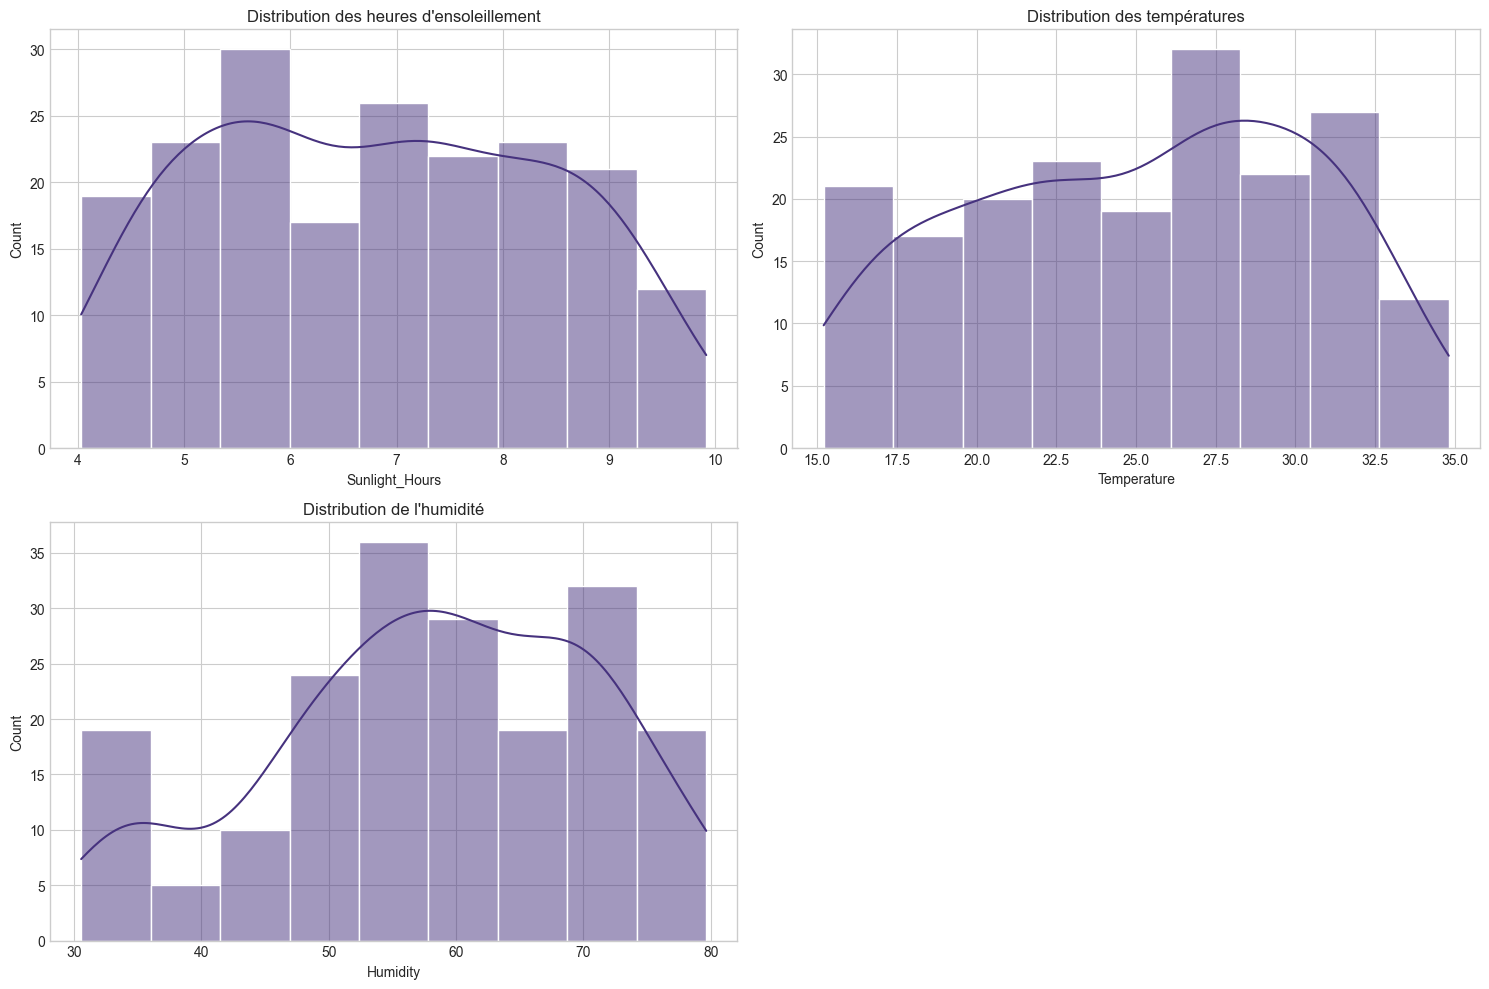

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Sunlight_Hours'], kde=True)
plt.title('Distribution des heures d\'ensoleillement')

plt.subplot(2, 2, 2)
sns.histplot(df['Temperature'], kde=True)
plt.title('Distribution des températures')

plt.subplot(2, 2, 3)
sns.histplot(df['Humidity'], kde=True)
plt.title('Distribution de l\'humidité')

plt.tight_layout()
plt.show()



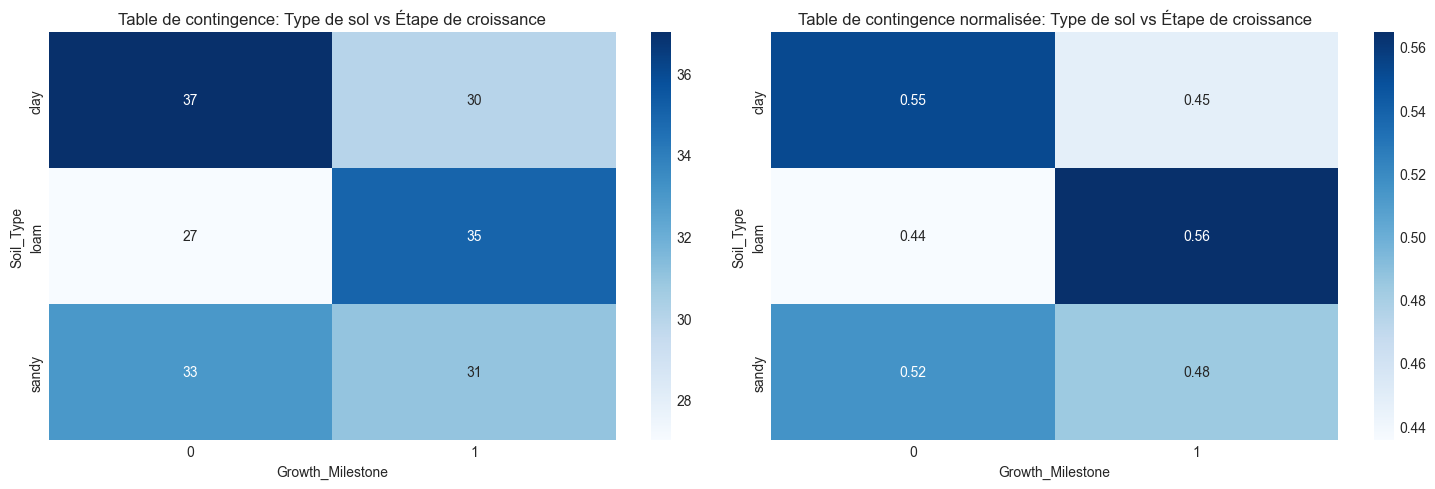

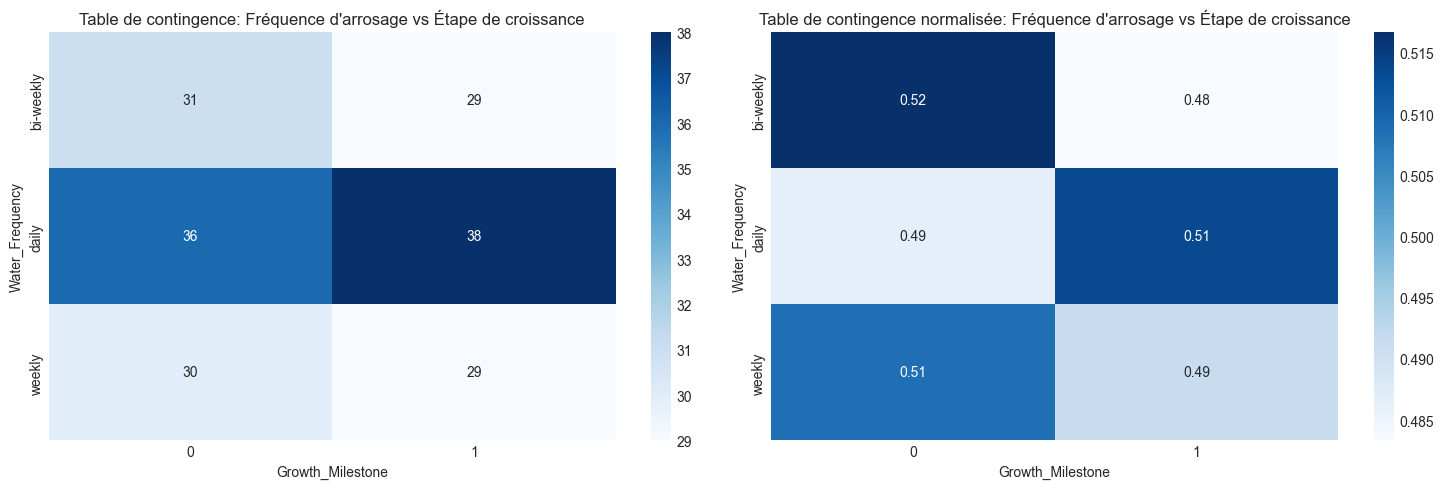

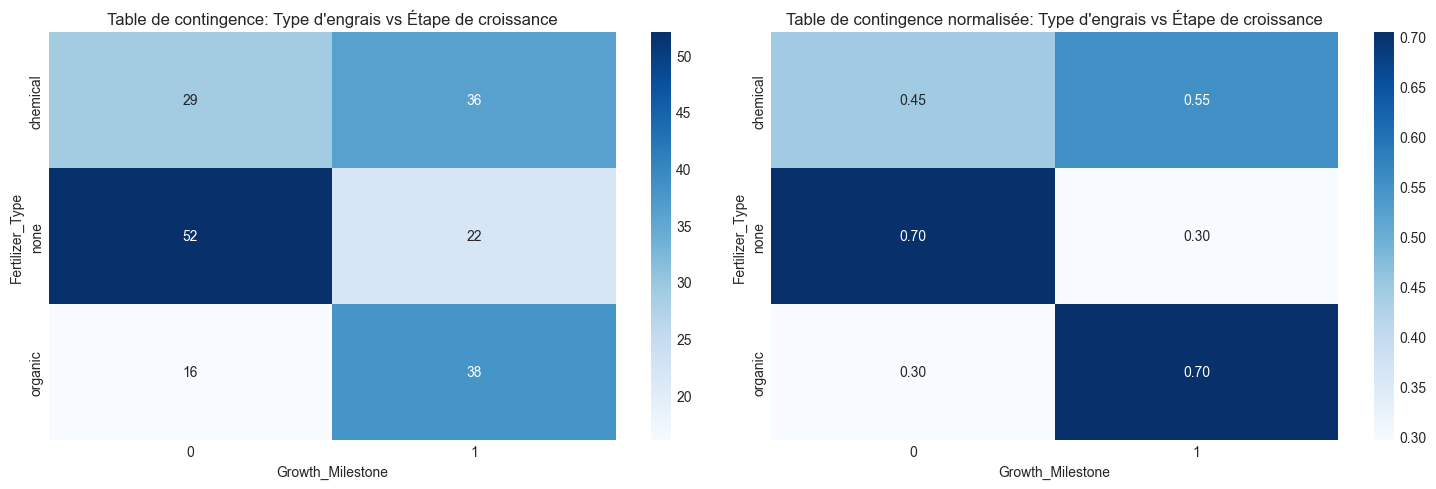

In [14]:
ct_soil = pd.crosstab(df['Soil_Type'], df['Growth_Milestone'])
ct_soil_normalized = pd.crosstab(df['Soil_Type'], df['Growth_Milestone'], normalize='index')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(ct_soil, annot=True, cmap='Blues', fmt='d')
plt.title('Table de contingence: Type de sol vs Étape de croissance')

plt.subplot(1, 2, 2)
sns.heatmap(ct_soil_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Table de contingence normalisée: Type de sol vs Étape de croissance')
plt.tight_layout()
plt.show()

ct_water = pd.crosstab(df['Water_Frequency'], df['Growth_Milestone'])
ct_water_normalized = pd.crosstab(df['Water_Frequency'], df['Growth_Milestone'], normalize='index')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(ct_water, annot=True, cmap='Blues', fmt='d')
plt.title('Table de contingence: Fréquence d\'arrosage vs Étape de croissance')

plt.subplot(1, 2, 2)
sns.heatmap(ct_water_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Table de contingence normalisée: Fréquence d\'arrosage vs Étape de croissance')
plt.tight_layout()
plt.show()

ct_fertilizer = pd.crosstab(df['Fertilizer_Type'], df['Growth_Milestone'])
ct_fertilizer_normalized = pd.crosstab(df['Fertilizer_Type'], df['Growth_Milestone'], normalize='index')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(ct_fertilizer, annot=True, cmap='Blues', fmt='d')
plt.title('Table de contingence: Type d\'engrais vs Étape de croissance')

plt.subplot(1, 2, 2)
sns.heatmap(ct_fertilizer_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Table de contingence normalisée: Type d\'engrais vs Étape de croissance')
plt.tight_layout()
plt.show()


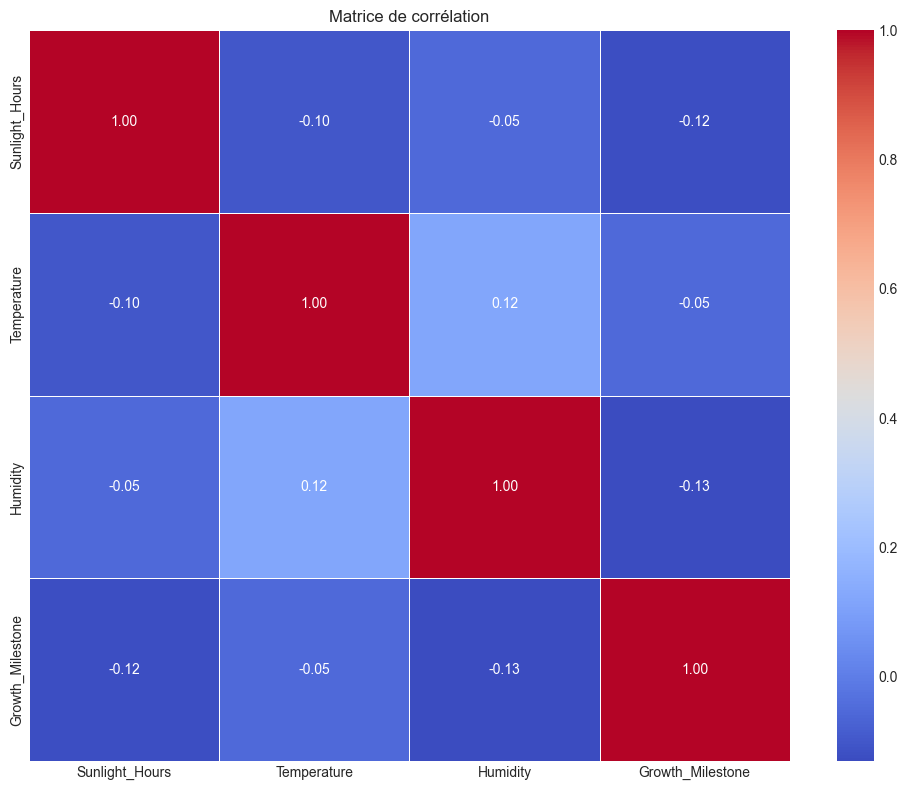

In [15]:
plt.figure(figsize=(10, 8))
numeric_columns = ['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()


In [16]:
le_soil = LabelEncoder()
le_water = LabelEncoder()
le_fertilizer = LabelEncoder()

df_encoded = df.copy()
df_encoded['Soil_Type_Encoded'] = le_soil.fit_transform(df['Soil_Type'])
df_encoded['Water_Frequency_Encoded'] = le_water.fit_transform(df['Water_Frequency'])
df_encoded['Fertilizer_Type_Encoded'] = le_fertilizer.fit_transform(df['Fertilizer_Type'])

print("\nEncodage du type de sol:")
for i, category in enumerate(le_soil.classes_):
    print(f"{category} -> {i}")

print("\nEncodage de la fréquence d'arrosage:")
for i, category in enumerate(le_water.classes_):
    print(f"{category} -> {i}")

print("\nEncodage du type d'engrais:")
for i, category in enumerate(le_fertilizer.classes_):
    print(f"{category} -> {i}")



Encodage du type de sol:
clay -> 0
loam -> 1
sandy -> 2

Encodage de la fréquence d'arrosage:
bi-weekly -> 0
daily -> 1
weekly -> 2

Encodage du type d'engrais:
chemical -> 0
none -> 1
organic -> 2


In [17]:
scaler = StandardScaler()
numeric_features = ['Sunlight_Hours', 'Temperature', 'Humidity']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print("\nAperçu des données encodées et normalisées:")
df_encoded.head()



Aperçu des données encodées et normalisées:


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Soil_Type_Encoded,Water_Frequency_Encoded,Fertilizer_Type_Encoded
0,loam,-1.024340,bi-weekly,chemical,1.244039,0.277238,0,1,0,0
1,sandy,-1.750923,weekly,organic,0.719700,-0.450562,1,2,2,2
2,loam,1.295184,bi-weekly,none,-0.355230,-1.066621,0,1,0,1
3,loam,0.886734,bi-weekly,none,-1.237800,-0.925920,0,1,0,1
4,sandy,0.970038,bi-weekly,organic,-1.300933,0.438684,0,2,0,2


In [18]:
X = df_encoded[['Soil_Type_Encoded', 'Water_Frequency_Encoded',
                'Fertilizer_Type_Encoded', 'Sunlight_Hours',
                'Temperature', 'Humidity']]
y = df_encoded['Growth_Milestone']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nDimensions des jeux de données:")
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")



Dimensions des jeux de données:
Train: (115, 6), (115,)
Validation: (39, 6), (39,)
Test: (39, 6), (39,)


In [19]:
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


from pathlib import Path

Path('../data/processed').mkdir(parents=True, exist_ok=True)

train_data.to_csv('../data/processed/train.csv', index=False)
val_data.to_csv('../data/processed/val.csv', index=False)
test_data.to_csv('../data/processed/test.csv', index=False)

print("\nLes ensembles de données prétraités ont été sauvegardés dans le dossier data/processed/")



Les ensembles de données prétraités ont été sauvegardés dans le dossier data/processed/
